<a href="https://colab.research.google.com/github/saraygarciag/Tareas_Saray_Garcia/blob/main/SarayGarcia_Taller_Regularizacion_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taller Regularización y SVM


Para esta tarea consideramos un conjunto de observaciones sobre una serie de variedades de vino tinto y blanco que implican sus propiedades químicas y su clasificación por parte de los catadores. La industria del vino ha experimentado un gran crecimiento en los últimos tiempos debido al aumento del consumo social. El precio del vino depende de un concepto bastante abstracto de apreciación del vino por parte de los catadores, cuya opinión puede tener un alto grado de variabilidad. El precio del vino depende en cierta medida de este factor tan volátil. Otro factor clave en la certificación y evaluación de la calidad del vino son las pruebas fisicoquímicas, que se realizan en laboratorio y tienen en cuenta factores como la acidez, el nivel de pH, la presencia de azúcar y otras propiedades químicas. Para el mercado del vino, sería interesante que la calidad humana de la cata pudiera relacionarse con las propiedades químicas del vino para que el proceso de certificación y evaluación de la calidad estuviera más controlado.

Se dispone de dos conjuntos de datos, uno de los cuales se refiere al vino tinto y cuenta con 1.599 variedades diferentes, y el otro, al vino blanco, con 4.898 variedades. Todos los vinos se producen en una zona concreta de Portugal. Se recogen datos sobre 12 propiedades diferentes de los vinos, una de las cuales es la calidad, basada en datos sensoriales, y el resto son propiedades químicas de los vinos, como la densidad, la acidez, el contenido de alcohol, etc. Todas las propiedades químicas de los vinos son variables continuas. La calidad es una variable ordinal con una clasificación posible de 1 (peor) a 10 (mejor). Cada variedad de vino es catada por tres catadores independientes y la clasificación final asignada es la mediana de la clasificación dada por los catadores.

Se espera que un modelo predictivo desarrollado a partir de estos datos sirva de orientación a los viñedos en cuanto a la calidad y el precio que se espera obtener de sus productos sin depender en gran medida de la volatilidad de los catadores.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [3]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
653,5.9,0.24,0.26,12.3,0.053,34.0,134.0,0.99720,3.34,0.45,9.5,6,white
2904,6.4,0.25,0.32,0.9,0.034,40.0,114.0,0.99114,3.31,0.58,10.8,7,white
6020,6.3,0.47,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.3,6,red
2335,8.3,0.27,0.34,10.2,0.048,50.0,118.0,0.99716,3.18,0.51,10.3,5,white
3478,6.2,0.36,0.45,10.4,0.060,22.0,184.0,0.99711,3.31,0.56,9.8,6,white


In [4]:
data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
data.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

# Ejercicio 1

Mostrar la tabla de frecuencias de la calidad por tipo de vino.

In [6]:
100 * data['type'].value_counts() / len(data['type'])

white    75.388641
red      24.611359
Name: type, dtype: float64

In [7]:
pd.crosstab(data.quality,data.type, normalize='index')\
    .round(4)

type,red,white
quality,,
3,0.3333,0.6667
4,0.2454,0.7546
5,0.3185,0.6815
6,0.2250,0.7750
7,0.1844,0.8156
8,0.0933,0.9067
9,0.0000,1.0000


In [10]:
pd.crosstab(index=data["quality"],     
                      columns=[data["type"]])

type,red,white
quality,,
3,10,20
4,53,163
5,681,1457
6,638,2198
7,199,880
8,18,175
9,0,5


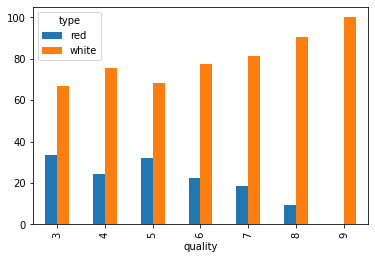

In [9]:
plot = pd.crosstab(index=data['quality'],
            columns=data['type']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

# Regularización

# Ejercicio 2

* Entrenar una regresión lineal para predecir la calidad del vino (Continuo)

* Analice los coeficientes

* Evaluar el RMSE

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

In [12]:
data['type2'] = data['type'].map({'white':0, 'red':1})
data['quality2'] = data.quality.map({3:0, 4:0, 5:0, 6:1, 7:1, 8:1, 9:1})

In [83]:
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','type2']

X = data[feature_cols]
y = data.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5197, 12) (1300, 12) (5197,) (1300,)


In [46]:
#Modelo de regresión lineal:
modeloreg = LinearRegression()
modeloreg.fit(X_train, y_train)
y_pred = modeloreg.predict(X_test)

print("Coeficientes regresión lineal: ",modeloreg.coef_)

# RMSE:
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coeficientes regresión lineal:  [ 8.54940888e-02 -1.49758834e+00 -6.78944004e-02  6.41440109e-02
 -7.78717492e-01  4.71921844e-03 -1.23848988e-03 -1.04642791e+02
  5.07676763e-01  6.92181980e-01  2.32039126e-01  3.84830323e-01]
RMSE:  0.7412790604053446


### Análisis: 


*   Si fixed acidity aumenta en una unidad, la calidad del vino aumentaría en 0.085494.
*   Si volatile acidity aumenta en una unidad, la calidad del vino disminuirá en 1.4975.
*   Si citric acid aumenta en una unidad, la calidad del vino disminuirá en 0.0678.
*   Si residual sugar aumenta en una unidad, la calidad del vino aumentaría en 0.064144.
*   Si chlorides aumenta en una unidad, la calidad del vino disminuirá en 0.7787.
*   Si free sulfur dioxide aumenta en una unidad, la calidad del vino aumentaría en 0.04719.
*   Si total sulfur dioxide aumenta en una unidad, la calidad del vino disminuirá en 1.2384.
*   Si density aumenta en una unidad, la calidad del vino disminuirá en 1.0464.
*   Si pH aumenta en una unidad, la calidad del vino aumentaría en 0.507.
*   Si sulphates aumenta en una unidad, la calidad del vino aumentaría en 0.69218.
*   Si alcohol aumenta en una unidad, la calidad del vino aumentaría en 0.2320.
*   Si es más probable que sea tipo de vino rojo en una unidad, la calidad del vino aumentaría en 0.3848.













# Ejercicio 3

* Estimar una regresión de Ridge con alfa igual a 0,1 y 1.
* Compare y analice los coeficientes de Ridge con la regresión lineal
* Evaluar el RMSE

In [25]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [37]:
#Ridge con alfa=0.1
ridgereg1 = Ridge(alpha=0.1, normalize=True)
ridgereg1.fit(X_train, y_train)
y1_pred = ridgereg1.predict(X_test)
print("Coeficientes de Ridge con alpha = 0.1: ", '\n', '\n', ridgereg1.coef_)

Coeficientes de Ridge con alpha = 0.1:  
 
 [ 2.44588347e-02 -1.23753983e+00  3.14879877e-02  2.99064342e-02
 -1.20249690e+00  4.40719004e-03 -1.38038043e-03 -3.77806705e+01
  2.22099107e-01  5.89285509e-01  2.62397115e-01  1.39215540e-01]


In [29]:
#Ridge con alfa=1
ridgereg2 = Ridge(alpha=1, normalize=True)
ridgereg2.fit(X_train, y_train)
y2_pred = ridgereg2.predict(X_test)
print("Coeficientes de Ridge con alpha = 1: ", '\n', '\n', ridgereg2.coef_)

Coeficientes de Ridge con alpha = 1:  
 
 [ 1.86223905e-04 -5.68051730e-01  1.68619002e-01  5.73521034e-03
 -1.33305626e+00  1.61200670e-03 -5.81848853e-04 -2.30475660e+01
  7.65433089e-02  2.91695372e-01  1.40694735e-01 -1.26603805e-02]


In [41]:
compara = pd.DataFrame({'Variables': X.columns,'Regresión lineal':modeloreg.coef_,
                   'Regresión Ridge 0.1':ridgereg1.coef_,'Regresión Ridge 1':ridgereg2.coef_})
compara

,Variables,Regresión lineal,Regresión Ridge 0.1,Regresión Ridge 1
0,fixed acidity,0.085494,0.024459,0.000186
1,volatile acidity,-1.497588,-1.237540,-0.568052
2,citric acid,-0.067894,0.031488,0.168619
3,residual sugar,0.064144,0.029906,0.005735
4,chlorides,-0.778717,-1.202497,-1.333056
5,free sulfur dioxide,0.004719,0.004407,0.001612
6,total sulfur dioxide,-0.001238,-0.001380,-0.000582
7,density,-104.642791,-37.780670,-23.047566
8,pH,0.507677,0.222099,0.076543
9,sulphates,0.692182,0.589286,0.291695


### Análisis de coeficientes ridge comparados con la regresión lineal:

*   Se observa que los coeficientes con ridge 0.1 ó 1 siempre siguen un patron en los signos de los coeficientes, por el contrario, al ser comparados con la regresión lineal, los signos de los coeficientes de citric acid, y type2 varían, también se nota que generalmente los coeficientes de la regresion lineal son mucho más grandes, ya sean positivos o negativos.


In [45]:
print("RMSE de la regresión lineal: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE ridge con alfa 0.1: ", np.sqrt(metrics.mean_squared_error(y_test, y1_pred)))
print("RMSE ridge con alfa 1: ", np.sqrt(metrics.mean_squared_error(y_test, y2_pred)))


RMSE de la regresión lineal:  0.7412790604053446
RMSE ridge con alfa 0.1:  0.7419468070835197
RMSE ridge con alfa 1:  0.77294081168326


# Ejercicio 4

* Estimar una regresión lasso con alfa igual a 0,01, 0,1 y 1.
* Comparar los coeficientes con la regresión lineal
* Evaluar el RMSE

In [47]:
from sklearn.linear_model import Lasso

In [51]:
#Lasso alfa 0.01
lassoreg1 = Lasso(alpha=0.01, normalize=True)
lassoreg1.fit(X_train, y_train)
yl1_pred = lassoreg1.predict(X_test)
print("Coeficientes de Lasso con alpha = 0.01: ", '\n', '\n', lassoreg1.coef_)

Coeficientes de Lasso con alpha = 0.01:  
 
 [-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0.]


In [52]:
#Lasso alfa 0.1
lassoreg2 = Lasso(alpha=0.1, normalize=True)
lassoreg2.fit(X_train, y_train)
yl2_pred = lassoreg2.predict(X_test)
print("Coeficientes de Lasso con alpha = 0.1: ", '\n', '\n', lassoreg2.coef_)

Coeficientes de Lasso con alpha = 0.1:  
 
 [-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0.]


In [53]:
#Lasso alfa 1
lassoreg3 = Lasso(alpha=1, normalize=True)
lassoreg3.fit(X_train, y_train)
yl3_pred = lassoreg3.predict(X_test)
print("Coeficientes de Lasso con alpha = 1: ", '\n', '\n', lassoreg3.coef_)

Coeficientes de Lasso con alpha = 1:  
 
 [-0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0. -0.]


In [54]:
compara2 = pd.DataFrame({'Variables': X.columns,'Regresión lineal':modeloreg.coef_,
                   'Regresión Lasso 0.01':lassoreg1.coef_,'Regresión Lasso 0.1':lassoreg2.coef_, 'Regresión Lasso 1':lassoreg3.coef_ })
compara2

,Variables,Regresión lineal,Regresión Lasso 0.01,Regresión Lasso 0.1,Regresión Lasso 1
0,fixed acidity,0.085494,-0.0,-0.0,-0.0
1,volatile acidity,-1.497588,-0.0,-0.0,-0.0
2,citric acid,-0.067894,0.0,0.0,0.0
3,residual sugar,0.064144,-0.0,-0.0,-0.0
4,chlorides,-0.778717,-0.0,-0.0,-0.0
5,free sulfur dioxide,0.004719,0.0,0.0,0.0
6,total sulfur dioxide,-0.001238,-0.0,-0.0,-0.0
7,density,-104.642791,-0.0,-0.0,-0.0
8,pH,0.507677,0.0,0.0,0.0
9,sulphates,0.692182,0.0,0.0,0.0


### Analisis: 
Los coeficientes de Lasso dieron todos 0, por el contrario en la regresion lineal sí dieron valores interpretables.

In [55]:
print("RMSE de la regresión lineal: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("RMSE lasso con alfa 0.01: ", np.sqrt(metrics.mean_squared_error(y_test, yl1_pred)))
print("RMSE lasso con alfa 0.1: ", np.sqrt(metrics.mean_squared_error(y_test, yl2_pred)))
print("RMSE lasso con alfa 1: ", np.sqrt(metrics.mean_squared_error(y_test, yl3_pred)))

RMSE de la regresión lineal:  0.7412790604053446
RMSE lasso con alfa 0.01:  0.8683174491433667
RMSE lasso con alfa 0.1:  0.8683174491433667
RMSE lasso con alfa 1:  0.8683174491433667


### El RMSE con lasso es mucho más alto que con la regresión lineal.

# Ejercicio 5

* Estandarizar las características (excepto la calidad del vino)

* Crear una variable objetivo binaria para cada tipo de vino

* Analizar los coeficientes

* * Evalúe con F1, AUC-ROC y log-loss

In [82]:
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
                 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','type2']

X = data[feature_cols]
y = data.quality2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5197, 12) (1300, 12) (5197,) (1300,)


In [64]:
#Estandarizar las variables
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

# Crear variables binarias
data['type2'] = data['type'].map({'white':0, 'red':1})
data.loc[data.quality <= 5, 'quality2'] = 0
data.loc[data.quality > 5, 'quality2'] = 1

#Regresion logistica:
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(X_train2, y_train)
y_pred = logreg.predict(X_test2)

print(logreg.coef_)

[[ 0.12271096 -0.81606621 -0.06079562  0.56870553 -0.04899546  0.29175436
  -0.31925948 -0.38614463  0.1286662   0.30265429  1.02791489  0.31196008]]


### Análisis: 
Los coefiecientes de la regresión logistica son muy cercanos a 0, similar a lo que ocurria en las regresiones anteriores.

In [65]:
from sklearn.metrics import f1_score
print('F1 score:', metrics.f1_score(y_test, y_pred))

F1 score: 0.7777777777777777


In [66]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score:', metrics.roc_auc_score(y_test, y_pred, average=None))

ROC AUC score: 0.683875


In [67]:
print('Log Loss:', metrics.log_loss(y_test, y_pred))

Log Loss: 9.88354086856439


# Ejercicio 6

* Estimar una regresión logística regularizada usando:
* C = 0.01, 0.1 & 1.0
* penalización = ['l1, 'l2']
* Compare los coeficientes y la puntuación f1.

Nota: Para los valores de C y Penalización, deben realizar todas las posibles combinaciones entre estas dos variables.

In [79]:
#Regresión logistica regularizada con C = 0.01, penalización l1 y l2
    
logreg_001l1 = LogisticRegression(C=0.01, penalty='l1',solver='liblinear',multi_class='auto')
logreg_001l1.fit(X_train2, y_train)
y_pred_prob_001l1 = logreg_001l1.predict(X_test2)
print('Coeficientes regresión logistica regularizada con C = 0.01, penalización l1: \n', logreg_001l1.coef_)
print("\n")
print("f1 score c=0,01 penalización l1 :"+" "+str(f1_score(y_test, y_pred_prob_001l1)))


logreg_001l2 = LogisticRegression(C=0.01, penalty='l2',solver='liblinear',multi_class='auto')
logreg_001l2.fit(X_train2, y_train)
y_pred_prob_001l2 = logreg_001l2.predict(X_test2)
print("\n")
print('Coeficientes regresión logistica regularizada con C = 0.01, penalización l2: \n', logreg_001l2.coef_)
print("\n")
print("f1 score c=0,01 penalización l2 :"+" "+str(f1_score(y_test, y_pred_prob_001l2)))

Coeficientes regresión logistica regularizada con C = 0.01, penalización l1: 
 [[ 0.00000000e+00 -5.13391474e-01  0.00000000e+00  7.39611477e-02
   0.00000000e+00  6.05257786e-05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.33004969e-01  9.11138810e-01  0.00000000e+00]]


f1 score c=0,01 penalización l1 : 0.76378896882494


Coeficientes regresión logistica regularizada con C = 0.01, penalización l2: 
 [[ 0.05370877 -0.61333693 -0.00984039  0.32820389 -0.08361312  0.22478727
  -0.27459385 -0.20399633  0.0873781   0.25543402  0.85594632  0.11346822]]


f1 score c=0,01 penalización l2 : 0.7755102040816327


In [77]:
#Regresión logistica regularizada con C = 0.1, penalización l1 y l2
    
logreg_01l1 = LogisticRegression(C=0.1, penalty='l1',solver='liblinear',multi_class='auto')
logreg_01l1.fit(X_train2, y_train)
y_pred_prob_01l1 = logreg_01l1.predict(X_test2)
print('Coeficientes regresión logistica regularizada con C = 0.1, penalización l1: \n', logreg_01l1.coef_)
print("\n")
print("f1 score c=0,1 penalización l1 :"+" "+str(f1_score(y_test, y_pred_prob_01l1)))


logreg_01l2 = LogisticRegression(C=0.1, penalty='l2',solver='liblinear',multi_class='auto')
logreg_01l2.fit(X_train2, y_train)
y_pred_prob_01l2 = logreg_01l2.predict(X_test2)
print("\n")
print('Coeficientes regresión logistica regularizada con C = 0.1, penalización l2: \n', logreg_01l2.coef_)
print("\n")
print("f1 score c=0,1 penalización l2 :"+" "+str(f1_score(y_test, y_pred_prob_01l2)))


Coeficientes regresión logistica regularizada con C = 0.1, penalización l1: 
 [[ 0.         -0.78252414 -0.04909664  0.32117028 -0.04399304  0.27059608
  -0.31002914 -0.02955279  0.05158063  0.26344787  1.13979337  0.1610919 ]]


f1 score c=0,1 penalización l1 : 0.7767106842737094


Coeficientes regresión logistica regularizada con C = 0.1, penalización l2: 
 [[ 0.09917984 -0.78618167 -0.0539936   0.5079031  -0.05516917  0.28591875
  -0.31992243 -0.31846313  0.11479992  0.29530076  1.01984053  0.2636805 ]]


f1 score c=0,1 penalización l2 : 0.7763157894736842


In [78]:
#Regresión logistica regularizada con C = 1, penalización l1 y l2
    
logreg_1l1 = LogisticRegression(C=1, penalty='l1',solver='liblinear',multi_class='auto')
logreg_1l1.fit(X_train2, y_train)
y_pred_prob_1l1 = logreg_1l1.predict(X_test2)
print('Coeficientes regresión logistica regularizada con C = 1, penalización l1: \n', logreg_1l1.coef_)
print("\n")
print("f1 score c=1 penalización l1 :"+" "+str(f1_score(y_test, y_pred_prob_1l1)))


logreg_1l2 = LogisticRegression(C=1, penalty='l2',solver='liblinear',multi_class='auto')
logreg_1l2.fit(X_train2, y_train)
y_pred_prob_1l2 = logreg_1l2.predict(X_test2)
print("\n")
print('Coeficientes regresión logistica regularizada con C = 1, penalización l2: \n', logreg_1l2.coef_)
print("\n")
print("f1 score c=1 penalización l2 :"+" "+str(f1_score(y_test, y_pred_prob_1l2)))

Coeficientes regresión logistica regularizada con C = 1, penalización l1: 
 [[ 0.10401822 -0.8131942  -0.05890789  0.53722077 -0.0490095   0.28977916
  -0.31866429 -0.34025154  0.11770325  0.29818317  1.04295584  0.29572162]]


f1 score c=1 penalización l1 : 0.7751196172248804


Coeficientes regresión logistica regularizada con C = 1, penalización l2: 
 [[ 0.11947067 -0.81295874 -0.06011489  0.56094334 -0.04969763  0.29128744
  -0.31956177 -0.3768716   0.12674639  0.3017911   1.02794819  0.30608384]]


f1 score c=1 penalización l2 : 0.777313432835821


# SVM

# Ejercicio 7

Teniendo en cuenta las mismas variables de la regresión logística:

* Crear un objetivo binario para cada tipo de vino
* Crear dos SVM lineales para los vinos blancos y tintos, respectivamente.


# Ejercicio 8

* Probar las dos SVM utilizando los diferentes kernels ('poly', 'rbf', 'sigmoid')
* Evalúe con F1, AUC-ROC y log-loss


# Ejercicio 9
* Utilizando el mejor SVM encontrar los parámetros que da el mejor rendimiento teniendo en cuenta los siguientes hiperparámetros
'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]
* Evalúe cada modelo con F1, AUC-ROC y log-loss

Nota: Para los valores de C y gamma, deben realizar todas las posibles combinaciones entre estas dos variables.

# Ejercicio 10

Compare los resultados con todos los anteriores modelos y eliga ¿Cuál algoritmo con cuáles hiperparámetros es el que tiene mejor rendimiento según la puntuación F1, AUC-ROC y log-loss?